# Lab: Comparing Regression Models

Business objectives: 

- Retain customers.
- Analyze relevant customer data.
- Develop focused customer retention programs.
- Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
numerical_df = pd.read_csv('numerical (1).csv')
categorical_df = pd.read_csv('categorical.csv', index_col=0)

In [3]:
print(numerical_df.shape)
print(categorical_df.shape)

(9134, 8)
(9134, 14)


In [4]:
data = pd.concat([numerical_df, categorical_df], axis=1)
data.shape

(9134, 22)

In [38]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,4.494058,0.304920,4.127134,4.234107,4.430817,4.700480,5.700444
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,5.797731,0.896576,0.094407,5.610417,5.953102,6.307214,7.970478
policy_level,9134.0,2.320013,0.763047,1.000000,2.000000,3.000000,3.000000,3.000000


In [39]:
X = data.drop(['total_claim_amount'], axis=1)
y = data['total_claim_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1989)
X_train.shape, X_test.shape

((7307, 20), (1827, 20))

In [40]:
X_train_num = X_train.select_dtypes(include=np.number)
X_test_num = X_test.select_dtypes(include=np.number)
X_train_cat = X_train.select_dtypes(exclude=np.number)
X_test_cat = X_test.select_dtypes(exclude=np.number)
X_train_num.shape, X_train_cat.shape, X_test_num.shape, X_test_cat.shape

((7307, 8), (7307, 12), (1827, 8), (1827, 12))

In [41]:
scaler = MinMaxScaler().fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [42]:
X_train_num_scaled_df = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns, index=X_train_num.index) 
X_test_num_scaled_df = pd.DataFrame(X_test_num_scaled, columns = X_test_num.columns, index=X_test_num.index) 
X_train_num_scaled_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_level
4473,0.007183,0.875261,0.010170,0.428571,0.696970,0.0,0.000,0.5
4483,0.418603,0.000000,0.470600,0.057143,0.696970,0.0,0.125,0.5
7510,0.032056,0.838097,0.381523,0.514286,0.747475,0.0,0.000,1.0
3958,0.099354,0.331699,0.445672,0.800000,0.585859,0.0,0.250,1.0
4975,0.007096,0.479367,0.010170,0.057143,0.515152,0.0,0.000,1.0
...,...,...,...,...,...,...,...,...
4634,0.087961,0.739048,0.381523,0.542857,0.717172,0.0,0.875,0.0
455,0.010540,0.299377,0.120989,0.714286,0.343434,0.0,0.000,0.0
4924,0.040913,0.326427,0.049296,0.742857,0.404040,0.0,0.250,0.5
1796,0.377211,0.451906,0.932796,0.571429,0.575758,0.0,0.125,1.0


In [43]:
ordinal_mappings = {
    "coverage": {"Basic": 0, "Extended": 1, "Premium": 2},
    "employmentstatus": {"Unemployed": 0, "Employed": 1, "Medical Leave": 0, "Disabled": 0, "Retired": 0},
    "location_code": {"Rural": 0, "Suburban": 1, "Urban": 2},
    "vehicle_size": {"Small": 0, "Medsize": 1, "Large": 2},
    "education": {"High School or Below": 0, "College": 1, "Bachelor": 2, "Master": 3, "Doctor": 4},
    'policy_level': {'L1':1, 'L2':2, 'L3':3}
}
X_train_cat_encoded = X_train_cat.replace(ordinal_mappings)
X_test_cat_encoded = X_test_cat.replace(ordinal_mappings)

In [44]:
pd.DataFrame(X_train_cat_encoded)

,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
4473,No,0,0,1,M,2,Married,Personal,Offer3,Agent,Two-Door Car,1
4483,No,1,0,0,F,1,Single,Corporate,Offer1,Agent,Sports Car,1
7510,No,0,2,1,M,2,Married,Personal,Offer1,Branch,Sports Car,0
3958,No,1,3,1,F,0,Married,Personal,Offer2,Agent,SUV,1
4975,No,0,1,1,F,2,Married,Corporate,Offer2,Call Center,Two-Door Car,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4634,No,2,3,1,F,2,Married,Personal,Offer3,Web,Four-Door Car,1
455,No,0,2,0,M,1,Divorced,Corporate,Offer1,Branch,Four-Door Car,1
4924,No,0,0,1,M,2,Married,Personal,Offer1,Call Center,Four-Door Car,1
1796,No,2,4,1,F,1,Married,Personal,Offer3,Call Center,Luxury Car,1


In [46]:
encoder = OneHotEncoder(drop='first')
X_train_cat_ohe = encoder.fit_transform(X_train_cat_encoded)
X_test_cat_ohe = encoder.transform(X_test_cat_encoded)

In [47]:
X_train_cat_df = pd.DataFrame(X_train_cat_ohe.toarray(), columns=encoder.get_feature_names_out(X_train_cat_encoded.columns), index=X_train_cat_encoded.index)
X_test_cat_df = pd.DataFrame(X_test_cat_ohe.toarray(), columns=encoder.get_feature_names_out(X_test_cat_encoded.columns), index=X_test_cat_encoded.index)
X_train_cat_df

,response_Yes,coverage_1,coverage_2,education_1,education_2,education_3,education_4,employmentstatus_1,gender_M,location_code_1,location_code_2,marital_status_Married,marital_status_Single,policy_type_Personal,policy_type_Special,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_1,vehicle_size_2
4473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4483,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7510,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3958,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4975,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4634,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
455,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1796,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
X_train_processed = pd.concat([X_train_num_scaled_df, X_train_cat_df], axis=1)
X_test_processed = pd.concat([X_test_num_scaled_df, X_test_cat_df], axis=1)
X_train_processed

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_level,response_Yes,coverage_1,coverage_2,education_1,education_2,education_3,education_4,employmentstatus_1,gender_M,location_code_1,location_code_2,marital_status_Married,marital_status_Single,policy_type_Personal,policy_type_Special,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_1,vehicle_size_2
4473,0.007183,0.875261,0.010170,0.428571,0.696970,0.0,0.000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4483,0.418603,0.000000,0.470600,0.057143,0.696970,0.0,0.125,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7510,0.032056,0.838097,0.381523,0.514286,0.747475,0.0,0.000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3958,0.099354,0.331699,0.445672,0.800000,0.585859,0.0,0.250,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4975,0.007096,0.479367,0.010170,0.057143,0.515152,0.0,0.000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4634,0.087961,0.739048,0.381523,0.542857,0.717172,0.0,0.875,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
455,0.010540,0.299377,0.120989,0.714286,0.343434,0.0,0.000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4924,0.040913,0.326427,0.049296,0.742857,0.404040,0.0,0.250,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1796,0.377211,0.451906,0.932796,0.571429,0.575758,0.0,0.125,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
from sklearn.neighbors import KNeighborsRegressor
def k_value_analysis(X_train_processed, y_train, y_test): 
    k_values = list(range(1, 20))
    mse_scores = []

    for k in k_values:
        knn_model = KNeighborsRegressor(n_neighbors=k)
        knn_model.fit(X_train_processed, y_train)
        knn_pred = knn_model.predict(X_test_processed)
        mse = mean_squared_error(y_test, knn_pred)
        mse_scores.append(mse)

    # Plotting the MSE scores for different k values
    plt.figure(figsize=(5, 3))
    plt.plot(k_values, mse_scores, marker='o', linestyle='-', color='g')
    plt.title('MSE for different k values')
    plt.xlabel('k')
    plt.ylabel('MSE')
    plt.grid(True)
    plt.show()

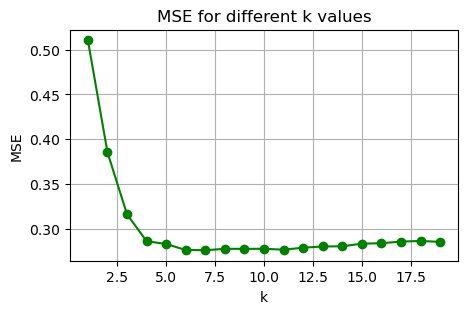

In [58]:
k_value_analysis(X_train_processed, y_train, y_test)

1. Initially, when k=1, the MSE is relatively high. This is a common occurrence since having only one neighbor can make the model sensitive to noisy data points.

2. Subsequently, the MSE decreases and stabilizes around the value of k=5, showing a plateau. Beyond this point, it gradually starts to increase.

3. Having a very small k (e.g., 1) implies a complex model that can overfit by capturing noise in the data. Conversely, a very large k results in an oversimplified model that may underfit. It seems that the optimal choice for k in this dataset falls within the range of k=5 to k=6.